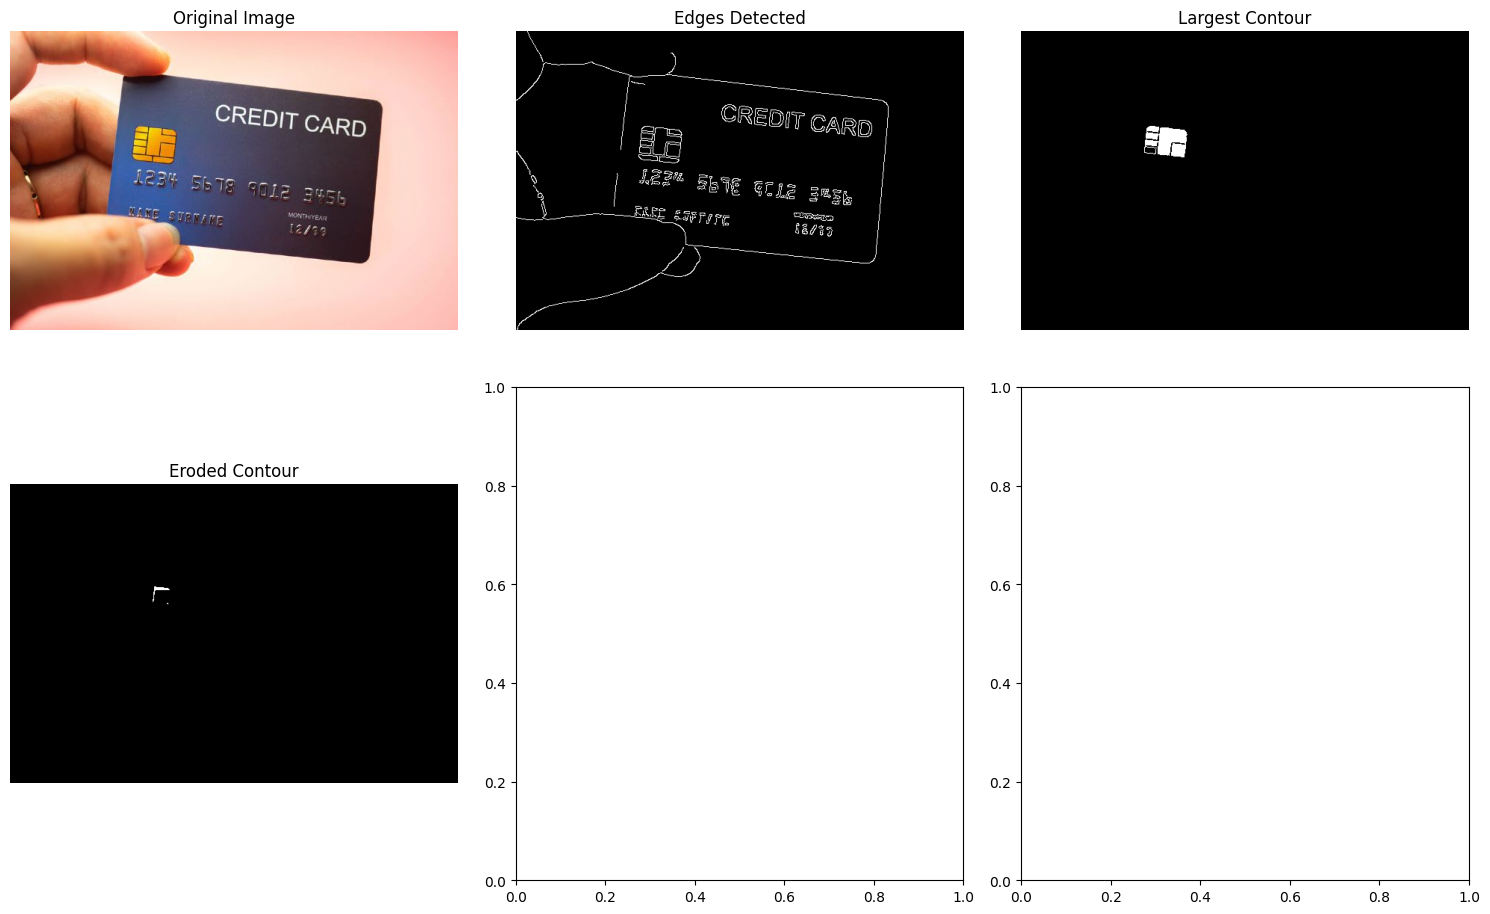

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('11 - Ya setty ew3i.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform edge detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize the largest contour
largest_contour = max(contours, key=cv2.contourArea, default=None)

# Create a blank image for the contour drawing
contour_image = np.zeros_like(gray)

# Draw the largest contour if it exists
if largest_contour is not None:
    cv2.drawContours(contour_image, [largest_contour], -1, (255), thickness=cv2.FILLED)

# Define the kernel for erosion
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))

# Apply erosion to the contour image
eroded_contour = cv2.erode(contour_image, kernel, iterations=1)

# Convert images to RGB for Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
contour_image_rgb = cv2.cvtColor(contour_image, cv2.COLOR_GRAY2RGB)
eroded_contour_rgb = cv2.cvtColor(eroded_contour, cv2.COLOR_GRAY2RGB)

# Plot the results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(image_rgb)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(edges_rgb)
axs[0, 1].set_title('Edges Detected')
axs[0, 1].axis('off')

axs[0, 2].imshow(contour_image_rgb)
axs[0, 2].set_title('Largest Contour')
axs[0, 2].axis('off')

axs[1, 0].imshow(eroded_contour_rgb)
axs[1, 0].set_title('Eroded Contour')
axs[1, 0].axis('off')

plt.tight_layout()
plt.show()
